<a href="https://colab.research.google.com/github/JananiSudeeptha/Pump-it-up---ML/blob/main/PumpItUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
folder_path = "/content/drive/Shareddrives/JAM/J_ML/PumpitUp/"

train_X_path = folder_path + "Training values.csv"
train_y_path = folder_path + "Training labels.csv"

test_x_path = folder_path + "Test.csv"

In [ ]:
train_x = pd.read_csv(train_X_path)
train_y = pd.read_csv(train_y_path)
test_x = pd.read_csv(test_x_path)

In [ ]:
df = pd.merge(train_x, train_y, on='id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [ ]:
test_x.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [ ]:
df["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [ ]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
train_x.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

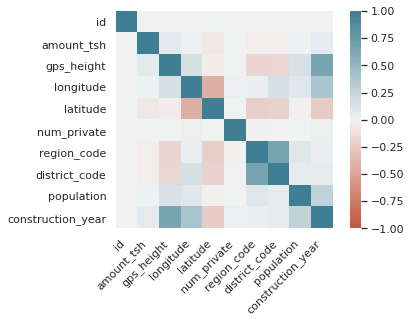

In [ ]:
corr = train_x.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
train_x["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
train_x["management"].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
train_x['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [ ]:
# loc selects only specific rows
train_x.loc[train_x['management_group']=='user-group']['management'].value_counts()

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

In [ ]:
train_x.groupby(['management_group','management']).count() 

id  ...  waterpoint_type_group
management_group management               ...                       
commercial       company             685  ...                    685
                 private operator   1971  ...                   1971
                 trust                78  ...                     78
                 water authority     904  ...                    904
other            other               844  ...                    844
                 other - school       99  ...                     99
parastatal       parastatal         1768  ...                   1768
unknown          unknown             561  ...                    561
user-group       vwc               40507  ...                  40507
                 water board        2933  ...                   2933
                 wua                2535  ...                   2535
                 wug                6515  ...                   6515

[12 rows x 38 columns]

In [ ]:
train_x['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [ ]:
train_x['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

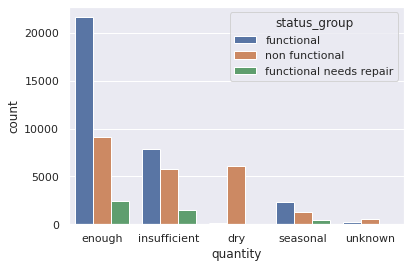

In [ ]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

In [ ]:
train_x["region"].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [ ]:
train_x["region_code"].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [ ]:
train_x.groupby(["region", "region_code"]).count()

id  ...  waterpoint_type_group
region        region_code        ...                       
Arusha        2            3024  ...                   3024
              24            326  ...                    326
Dar es Salaam 7             805  ...                    805
Dodoma        1            2201  ...                   2201
Iringa        11           5294  ...                   5294
Kagera        18           3316  ...                   3316
Kigoma        16           2816  ...                   2816
Kilimanjaro   3            4379  ...                   4379
Lindi         8             300  ...                    300
              18              8  ...                      8
              80           1238  ...                   1238
Manyara       21           1583  ...                   1583
Mara          20           1969  ...                   1969
Mbeya         12           4639  ...                   4639
Morogoro      5            4006  ...                   4006
Mtwara        9             390  ...                    390
              90            917  ...                    917
              99            423  ...                    423
Mwanza        17             55  ...                     55
              19           3047  ...                   3047
Pwani         6            1609  ...                   1609
              40              1  ...                      1
              60           1025  ...                   1025
Rukwa         15           1808  ...                   1808
Ruvuma        10           2640  ...                   2640
Shinyanga     11              6  ...                      6
              14             20  ...                     20
              17           4956  ...                   4956
Singida       13           2093  ...                   2093
Tabora        14           1959  ...                   1959
Tanga         4            2513  ...                   2513
              5              34  ...                     34

[32 rows x 38 columns]

In [ ]:
train_x['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
train_x['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [ ]:
train_x['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

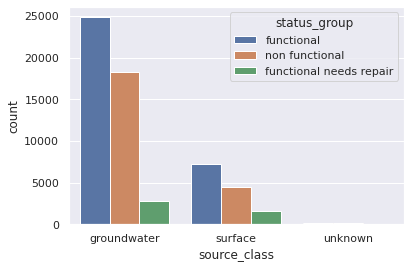

In [ ]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

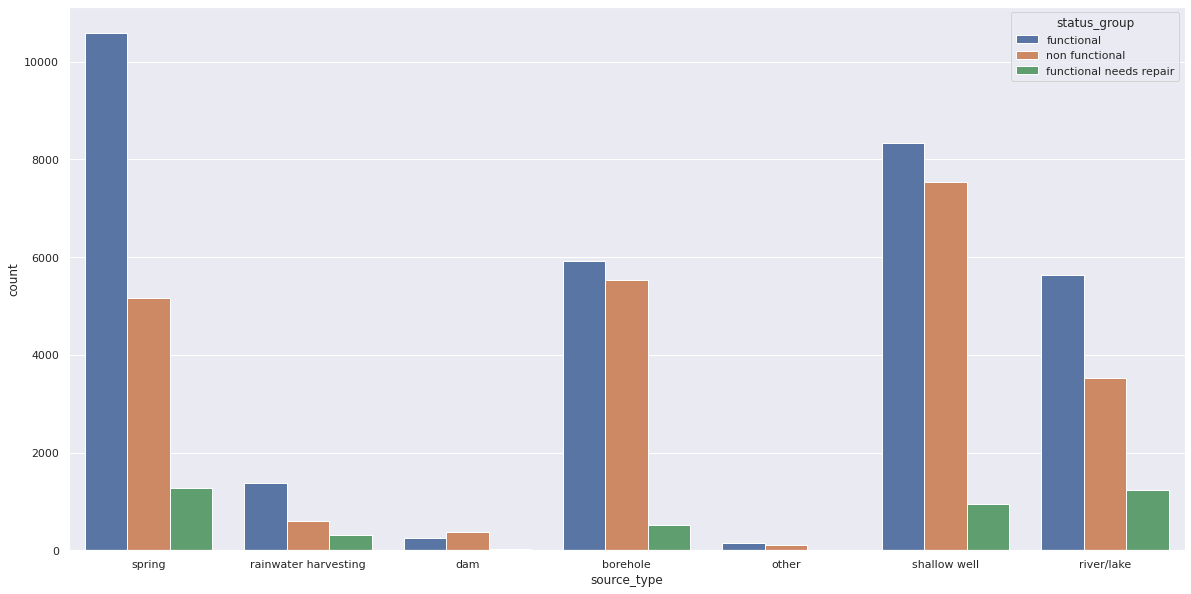

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source_type', hue="status_group", data=df)

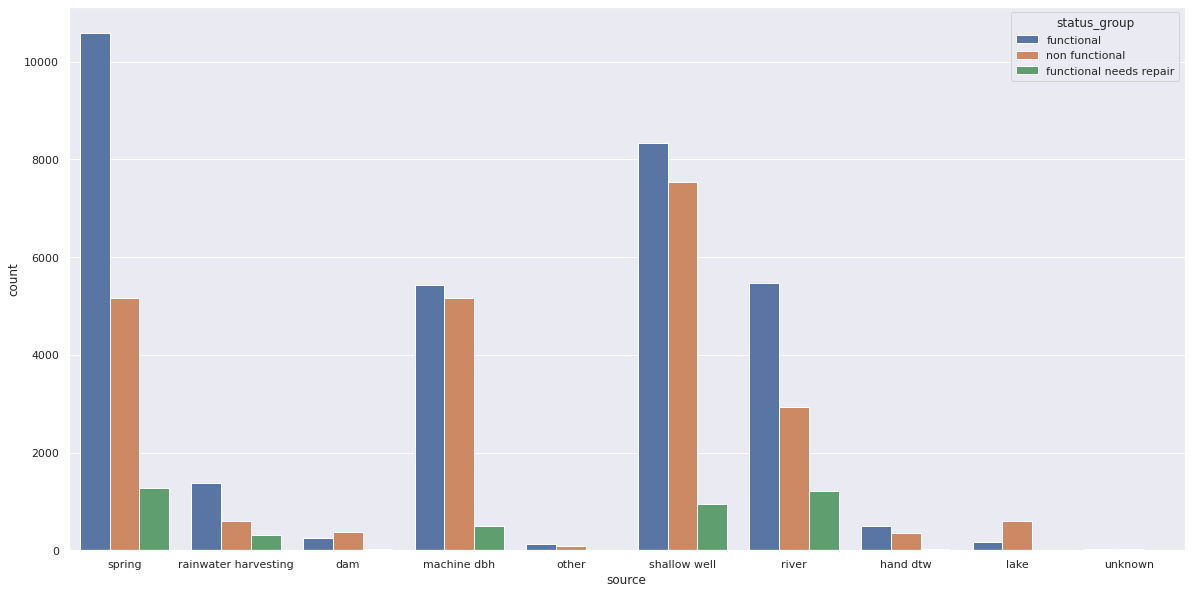

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

In [ ]:
train_x['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [ ]:
train_x['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

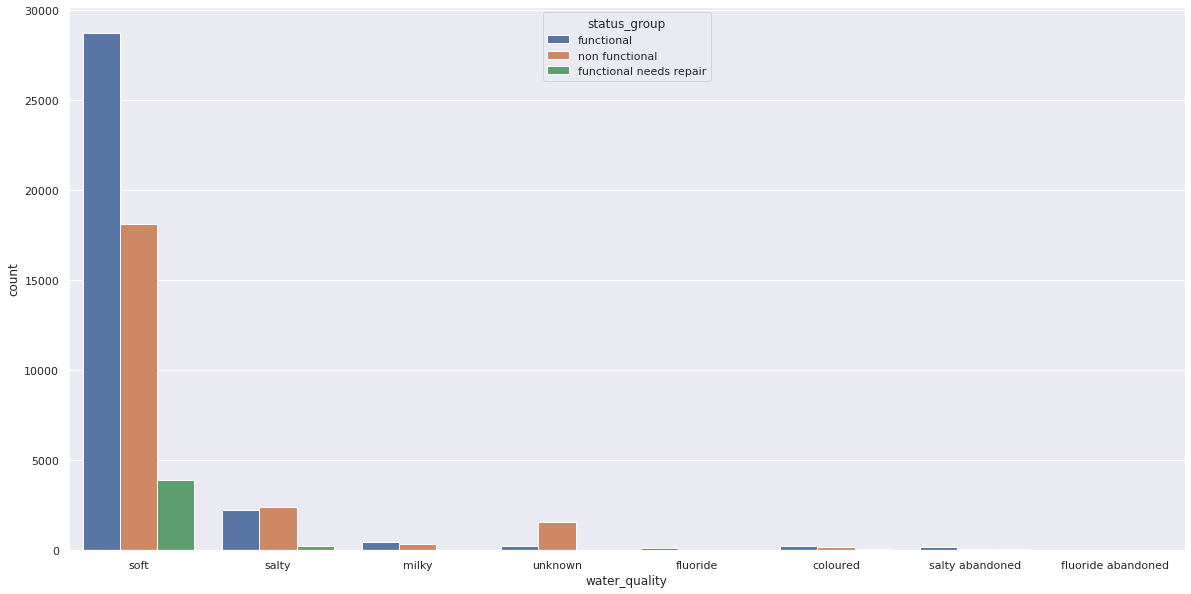

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

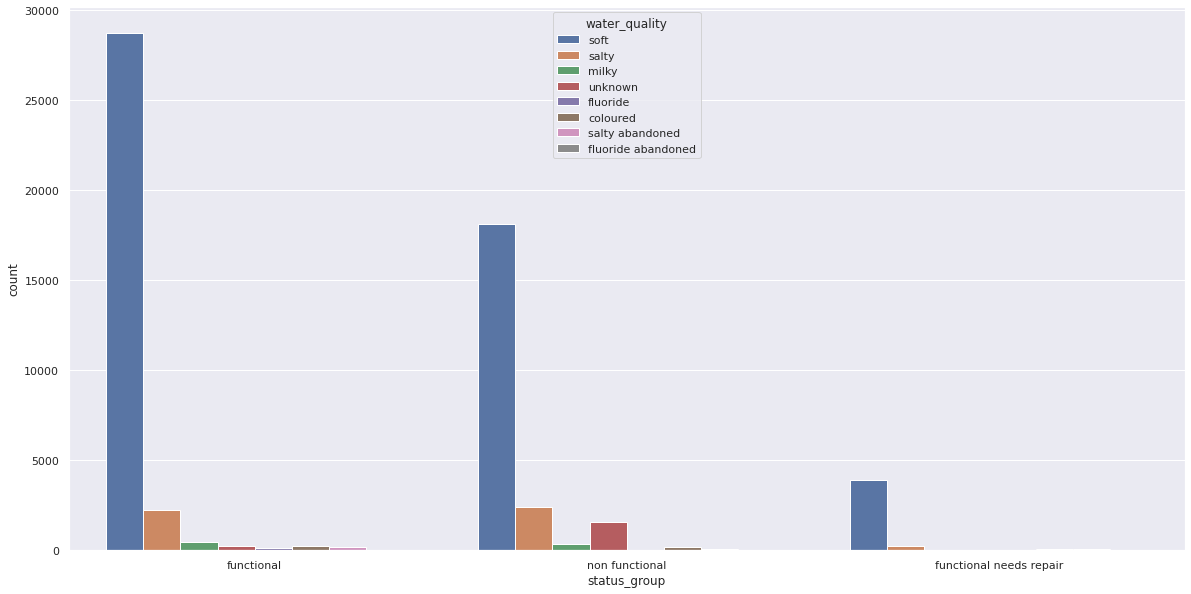

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

In [ ]:
train_x['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
train_x['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

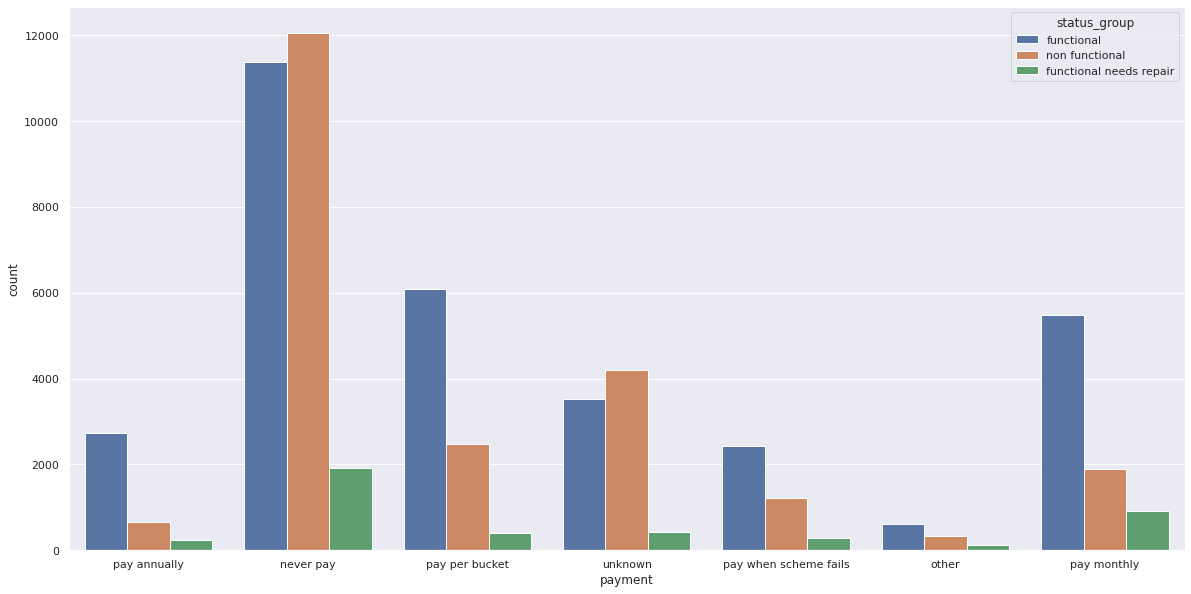

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

In [ ]:
train_x['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
train_x['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [ ]:
train_x['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [ ]:
df.groupby(['extraction_type_class','extraction_type_group']).count()

id  ...  status_group
extraction_type_class extraction_type_group         ...              
gravity               gravity                26780  ...         26780
handpump              afridev                 1770  ...          1770
                      india mark ii           2400  ...          2400
                      india mark iii            98  ...            98
                      nira/tanira             8154  ...          8154
                      other handpump           364  ...           364
                      swn 80                  3670  ...          3670
motorpump             mono                    2865  ...          2865
                      other motorpump          122  ...           122
other                 other                   6430  ...          6430
rope pump             rope pump                451  ...           451
submersible           submersible             6179  ...          6179
wind-powered          wind-powered             117  ...           117

[13 rows x 39 columns]

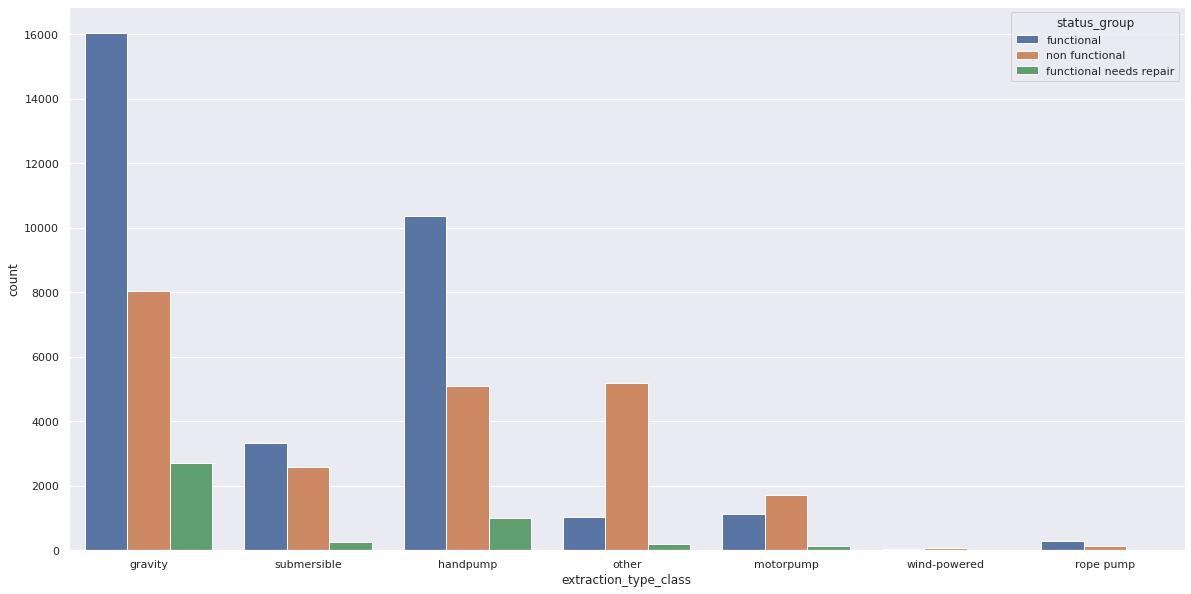

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

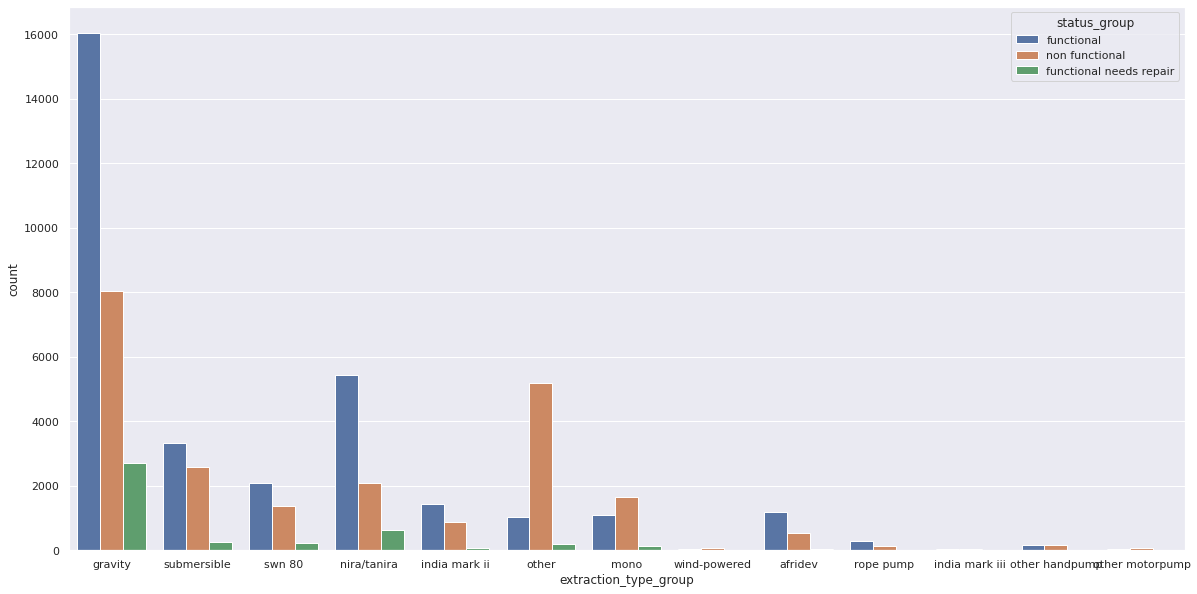

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

In [ ]:
train_x['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
train_x['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [ ]:
mean_year_train = train_x.loc[train_x['construction_year']>0].mean()
print(mean_year_train)
mean_year_test = test_x.loc[test_x['construction_year']>0].mean()
print(mean_year_test)

id                   37083.008736
amount_tsh             466.457534
gps_height            1002.367760
longitude               35.983262
latitude                -6.235372
num_private              0.707710
region_code             15.706495
district_code            5.969786
population             269.799617
public_meeting           0.915212
permit                   0.717332
construction_year     1996.814686
dtype: float64
id                   37089.356621
amount_tsh             482.979510
gps_height             991.467779
longitude               36.001278
latitude                -6.244305
num_private              0.634098
region_code             15.520542
district_code            5.955787
population             278.723879
public_meeting           0.911925
permit                   0.723062
construction_year     1997.097914
dtype: float64


In [ ]:
mean_pop_train = train_x.loc[train_x['population']>0].mean().population
print(mean_pop_train)
mean_pop_test = test_x.loc[test_x['population']>0].mean().population
print(mean_pop_test)

281.08716694284436
290.9541342981803


Changing identified features

In [ ]:
train_x.drop(columns = [
                        "region_code",
                        "management_group",
                        "scheme_management",
                        "quantity_group",
                        "quality_group",
                        "quantity_group",
                        "source_type",
                        "source_class",
                        "payment_type",
                        "extraction_type", 
                        "extraction_type_class",
                        "waterpoint_type_group"

], inplace=True)

test_x.drop(columns = [
                        "region_code",
                        "management_group",
                        "scheme_management",
                        "quantity_group",
                        "quality_group",
                        "quantity_group",
                        "source_type",
                        "source_class",
                        "payment_type",
                        "extraction_type", 
                        "extraction_type_class",
                        "waterpoint_type_group"

], inplace=True)

df.drop(columns = [
                        "region_code",
                        "management_group",
                        "scheme_management",
                        "quantity_group",
                        "quality_group",
                        "quantity_group",
                        "source_type",
                        "source_class",
                        "payment_type",
                        "extraction_type", 
                        "extraction_type_class",
                        "waterpoint_type_group"

], inplace=True)

In [ ]:
train_x.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_name              28166
permit                    3056
construction_year            0
extraction_type_group        0
management                   0
payment                      0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
dtype: int64

In [ ]:
train_x["recorded_by"].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [ ]:
train_x.drop(columns=["recorded_by"], inplace=True)
test_x.drop(columns=["recorded_by"], inplace=True)

In [ ]:
train_x['construction_year'].replace(to_replace = 0, value =1996 , inplace=True)
test_x['construction_year'].replace(to_replace = 0, value =1997 , inplace=True)
# df['construction_year'].replace(to_replace = 0, value =2000 , inplace=True)

In [ ]:
train_x['population'].replace(to_replace = 0, value =281 , inplace=True)
test_x['population'].replace(to_replace = 0, value =291 , inplace=True)

In [ ]:
train_x["tsh_per_person"] = train_x["amount_tsh"]/train_x["population"]
test_x["tsh_per_person"] = test_x["amount_tsh"]/test_x["population"]

In [ ]:
train_x.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,tsh_per_person
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,Roman,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,55.045872
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,NaN,NaN,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0.000000
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,0.100000
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,NaN,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0.000000
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,281,True,NaN,True,1996,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0.000000


In [ ]:
train_x['construction_year']

0        1999
1        2010
2        2009
3        1986
4        1996
         ... 
59395    1999
59396    1996
59397    1996
59398    1996
59399    2002
Name: construction_year, Length: 59400, dtype: int64

In [ ]:
def age(date):
  year = int(date.split("-")[0])
  return year

train_x["year_recorded"] = train_x["date_recorded"].apply(age)
train_x["age"] = train_x["year_recorded"] - train_x["construction_year"]

test_x["year_recorded"] = test_x["date_recorded"].apply(age)
test_x["age"] = test_x["year_recorded"] - test_x["construction_year"]

df["year_recorded"] = df["date_recorded"].apply(age)
df["age"] = df["year_recorded"] - df["construction_year"]

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [ ]:
train_x.drop(columns=["date_recorded"], inplace=True)
test_x.drop(columns=["date_recorded"], inplace=True)
df.drop(columns=["date_recorded"], inplace=True)

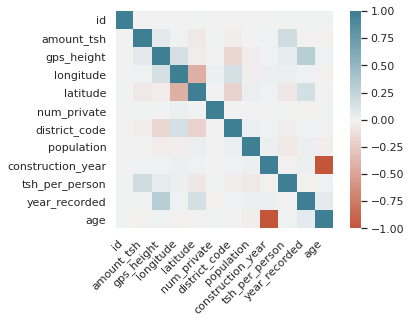

In [ ]:
corr = train_x.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
train_x['installer'].fillna(value='Unknown',inplace=True)  
test_x['installer'].fillna(value='Unknown',inplace=True)
df['installer'].fillna(value='Unknown',inplace=True)

train_x['funder'].fillna(value='Unknown',inplace=True)  
test_x['funder'].fillna(value='Unknown',inplace=True)
df['funder'].fillna(value='Unknown',inplace=True)

In [ ]:
train_x['installer'].value_counts().head(100).sum()
test_x['installer'].value_counts().head(100).sum()

11836

In [ ]:
train_x["funder"] = train_x['funder'].str.upper()
test_x["funder"] = test_x['funder'].str.upper()
df["funder"] = df['funder'].str.upper()

train_x["installer"] = train_x['installer'].str.upper()
test_x["installer"] = test_x['installer'].str.upper()
df["installer"] = df['installer'].str.upper()

In [ ]:
import regex
def replace_fun_ins(df, fun_ins):
  df[fun_ins].replace(to_replace = ('0', '-'), value ='UNKNOWN' , inplace=True)
  df[fun_ins].replace(to_replace = ('DW', 'DW#', 'DWE}', 'DWE/', 'DWEB', 'DEW', 
                                    'DW E', 'DWR', 'DW$', 'DW&', 'DWT'), value ='DWE' , inplace=True)
  df[fun_ins].replace(to_replace = ('RWI'), value ='RWE' , inplace=True)
  df[fun_ins].replace(to_replace = ('GRUMETISINGITA', 'GRUMETIFUND', 'GRUMET', 'GRUMENTI'), value ='GRUMETI' , inplace=True)
  df[fun_ins].replace(to_replace = ('COMMU', 'COMMUNIT'), value ='COMMUNITY' , inplace=True)
  df[fun_ins].replace(to_replace = ('JICA', 'JIKA', 'JAICACO'), value ='JAICA' , inplace=True)
  df[fun_ins].replace(to_replace = ('COUN', 'DISTRICT COUNCIL', 'DISTRICT COUNCI',
                                    'COUNC', 'DISTRI', 'COUNCIL'), value ='COMMUNITY' , inplace=True)
  df[fun_ins].replace(to_replace = ('DANIDA CO', 'DANDA', 'DANID'), value ='DANIDA' , inplace=True)
  df[fun_ins].replace(to_replace = ('ISF'), value ='IS' , inplace=True)
  df[fun_ins].replace(to_replace = ('KUWAITI'), value ='KUWAIT' , inplace=True)
  df[fun_ins].replace(to_replace = ('GOVER', 'GOVE', 'GO', 'GOT', 
                                    'GOVERN', 'GOVERNME', 'GOVERM'), value ='GOVERNMENT' , inplace=True)
  df[fun_ins].replace(to_replace = ('CENTR', 'CENTRAL GOVT', 'CENTAL GOVERNMENT',
                                    'CEBTRAL GOVERNMENT', 'CENTRA GOVERNMENT', 'CENTRA GOVT' 
                                    'GOVERN', 'GOVERNME', 'GOVERM'), value ='GOVERNMENT' , inplace=True)
  df[fun_ins].replace(to_replace = ('FINW', 'FINWATE', 'FINWATER', 'FINWATER', 'FINNWATER', 'FINWATER'), value ='FINI WATER' , inplace=True)
  df[fun_ins].replace(to_replace = ('KILIWATER', 'KILWATER', 'KILL WATER', 'KILIWATER R'), value ='KILI WATER' , inplace=True)
  df[fun_ins].replace(to_replace = ('RC', 'RC CH', 'RC CHURC', 'RC C', 'RC CATHORIC', 'RC .CHURCH'), value ='RC CHURCH' , inplace=True)
  df[fun_ins].replace(to_replace = ('DISTRI', 'DISTRICT COUNCI', 'DISTRICT  COUNCIL'), value ='DISTRICT COUNCIL' , inplace=True)
  df[fun_ins].replace(to_replace = ('SEMA CO', 'SEMA CO LTD', 'SEMA CONSULTANT'), value ='SEMA' , inplace=True)
  df[fun_ins].replace(to_replace = ('NORAD/'), value ='NORAD' , inplace=True)
  df[fun_ins].replace(to_replace = ('DISTRIC TWATER DEPAR', 'DISTRIC WATER DEPARTMENT', 'DISTRICTWATERDEPAR'), value ='DISTRICT WATER DEPARTMENT' , inplace=True)
  df[fun_ins].replace(to_replace = ('PRIVAT', 'PRIVATE INSTITUTION', 'PRIVATE INDIVIDUAL','PRIVATE TECHNICIAN', 
                                        'PRIVATE COMPANY', 'PRIVATE PERSON', 'PRIVATE INSTITUTIONS', 'PRIVA',
                                        'PRIVATE INDIVIDUALS', 'PRIVATE OWNED' ) ,value ='PRIVATE' , inplace=True)
  df[fun_ins].replace(to_replace = ('VILLIGERS', 'VILLAGER', 'VILLAGERS', 'VILLA', 'VILLAGE', 'VILLI', 'VILLAGE GOVERNMENT',
                                        'VILLAGE COUNCIL','VILLAGE COUNIL', 'VILLAGES', 'VILL', 'VILLAGE COMMUNITY', 'VILLAGE COUNCIL ORPHA'
                                        'VILLAERS',  'VILLAG','VILLEGE COUNCIL','VILLAGERD', 'VILLAGER', 'VILLAGE TECHNICIAN',
                                        'VILLAGE OFFICE','VILLAGE COMMUNITY MEMBERS', 'ENGARASERO VILLAGERS'),
                                          value ='VILLAGERS' , inplace=True)
  df[fun_ins].replace(to_replace = ('TWESA /COMMUNITY', 'TWESA/ COMMUNITY') , value ='TWESA/COMMUNITY' , inplace=True)
  df[fun_ins].replace(to_replace = ('UNISEF') , value ='UNICEF' , inplace=True)
  df[fun_ins].replace(to_replace = ('INSTITUTIONAL') , value ='INSTITUTION' , inplace=True)
  df[fun_ins].replace(to_replace = ('TASAF/','TASAF 1') ,value ='TASAF' , inplace=True)
  df[fun_ins].replace(to_replace = ('CONSULTING ENGINEER', 'CONSUTING ENGINEER', 'COSMOS ENGINEERING'
                                        'CONSULTANT ENGINEER', 'MINISTRY OF WATER ENGINEER', 'REGIONAL WATER ENGINEER ARUSHA',
                                        'YUMBAKA ENGINEERING', 'MAKE ENGINEERING', 'BUILDING WORKS ENGINEERING LTD',
                                        'ENGINEERS WITHOUT BORDER', 'MWANANCHI ENGINEERI') ,value ='ENGINEERING' , inplace=True)
  df[fun_ins].replace(to_replace = ('SECONDARY SCHOOL', 'LONGIDO SEC SCHOOL', 'SCHOOL', 'SCHOOL ADMINSTRARION',
                                        'MANYOTA PRIMARY SCHOOL', 'OVERLAND HIGH SCHOOL', 'EASTMERU MEDIUM SCHOOL',
                                        'SCHOOL ADM9NSTRARION', 'UPENDO PRIMARY SCHOOL', 'PRINCE MEDIUM SCHOOL','MBOZI SECONDARY SCHOOL',
                                        'MWL. NYERERE SEC. SCHOOL', 'S.P.C PRE-PRIMARY SCHOOL','MWL. NYERERE SEC.SCHOOL') ,value ='SCHOOL' , inplace=True)
  df[fun_ins].replace(to_replace = ('TANZANIA GOVERNMENT', 'BELGIAM GOVERNMENT', 'TANZANIAN GOVERNMENT', 
                                        'BRITISH COLONIAL GOVERNMENT', 'COLONIAL GOVERNMENT', 'ITALY GOVERNMENT',
                                        'EGYPT GOVERNMENT', 'GOVERNMENT OF MISRI', 'JAPAN GOVERNMENT', 'ITALIAN GOVERNMENT',
                                        'MISRI GOVERNMENT', 'BRITISH GOVERNMENT') , value ='OTHER GOVERNMENTS' , inplace=True)
  df[fun_ins] = df[fun_ins].str.replace(" ", "")

  return df


train_x = replace_fun_ins(train_x, 'installer')
test_x = replace_fun_ins(test_x, 'installer')
df = replace_fun_ins(df, 'installer')

train_x = replace_fun_ins(train_x, 'funder')
test_x = replace_fun_ins(test_x, 'funder')
df = replace_fun_ins(df, 'funder')


In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(train_x["installer"].value_counts())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_x["installer"].value_counts().head(70).sum())

12223


In [ ]:
train_x.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
scheme_name              28166
permit                    3056
construction_year            0
extraction_type_group        0
management                   0
payment                      0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
tsh_per_person               0
year_recorded                0
age                          0
dtype: int64

In [ ]:
test_x.isnull().sum()

id                          0
amount_tsh                  0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
scheme_name              7092
permit                    737
construction_year           0
extraction_type_group       0
management                  0
payment                     0
water_quality               0
quantity                    0
source                      0
waterpoint_type             0
tsh_per_person              0
year_recorded               0
age                         0
dtype: int64

In [ ]:
train_x["region"].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [ ]:
train_x.drop(columns = ["subvillage", "scheme_name"], inplace = True)
test_x.drop(columns = ["subvillage", "scheme_name"], inplace = True)
df.drop(columns = ["subvillage", "scheme_name"], inplace = True)

In [ ]:
train_x['public_meeting'].fillna(value=True,inplace=True)
test_x['public_meeting'].fillna(value=True,inplace=True)
df['public_meeting'].fillna(value=True,inplace=True)

In [ ]:
train_x['permit'].fillna(value=True, inplace=True)
test_x['permit'].fillna(value=True, inplace=True)
df['permit'].fillna(value=True, inplace=True)

In [ ]:
train_x.drop(columns = ["year_recorded", "construction_year"], inplace = True)
test_x.drop(columns = ["year_recorded", "construction_year"], inplace = True)
df.drop(columns = ["year_recorded", "construction_year"], inplace = True)

In [ ]:
train_x.isnull().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
permit                   0
extraction_type_group    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
tsh_per_person           0
age                      0
dtype: int64

In [ ]:
test_x.isnull().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
permit                   0
extraction_type_group    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
tsh_per_person           0
age                      0
dtype: int64

MODEL

In [ ]:
# installers = train_x.loc(train_x['installer'].value_counts()<=100)

# train_x.loc[(train_x["installer"].value_counts() <= 1000) , "installer"]

In [ ]:
# df.info()
df.drop(columns = ['installer', 'funder', 'lga', 'ward'], inplace =True)

In [ ]:
train_x.drop(columns = ['id', 'lga', 'ward'], inplace =True)
test_x.drop(columns = ['id', 'lga', 'ward'], inplace =True)

In [ ]:
train_x.loc[train_x['installer'].value_counts()[train_x['installer']].values < 100, 'installer'] = "OTHER"
train_x.loc[train_x['funder'].value_counts()[train_x['funder']].values < 100, 'funder'] = "OTHER"

test_x.loc[test_x['funder'].value_counts()[test_x['funder']].values < 18, 'funder'] = "OTHER"

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_x["installer"].value_counts())

DWE                             4426
UNKNOWN                         1081
GOVERNMENT                       763
COMMUNITY                        708
DANIDA                           418
HESAWA                           373
RWE                              292
KKKT                             225
TCRS                             180
CENTRALGOVERNMENT                170
WORLDVISION                      168
FINIWATER                        161
CES                              155
RCCHURCH                         128
VILLAGERS                        117
TASAF                            112
JAICA                            104
WEDECO                           100
DMDD                             100
AMREF                             95
LGA                               93
NORAD                             92
DA                                90
UNICEF                            89
TWESA                             79
KILIWATER                         77
WU                                76
A

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_x["installer"].value_counts())

DWE                           17691
OTHER                         10915
UNKNOWN                        4439
GOVERNMENT                     3070
COMMUNITY                      2850
DANIDA                         1676
HESAWA                         1395
RWE                            1207
KKKT                            910
CENTRALGOVERNMENT               763
TCRS                            707
WORLDVISION                     699
FINIWATER                       689
CES                             610
VILLAGERS                       481
RCCHURCH                        468
AMREF                           443
TASAF                           417
LGA                             413
JAICA                           406
WEDECO                          398
DMDD                            376
NORAD                           366
UNICEF                          332
TWESA                           316
DA                              308
WU                              301
IS                          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   wpt_name               59400 non-null  object 
 6   num_private            59400 non-null  int64  
 7   basin                  59400 non-null  object 
 8   region                 59400 non-null  object 
 9   district_code          59400 non-null  int64  
 10  population             59400 non-null  int64  
 11  public_meeting         59400 non-null  bool   
 12  recorded_by            59400 non-null  object 
 13  permit                 59400 non-null  bool   
 14  extraction_type_group  59400 non-null  object 
 15  ma

In [ ]:
df.isnull().sum()

id                       0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
district_code            0
population               0
public_meeting           0
recorded_by              0
permit                   0
extraction_type_group    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
age                      0
dtype: int64

In [ ]:
df.drop(columns = ['recorded_by'], inplace = True)
df.head()

,id,amount_tsh,gps_height,longitude,latitude,wpt_name,num_private,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,age
0,69572,6000.0,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,5,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,12
1,8776,0.0,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,2,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3
2,34310,25.0,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,4,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4
3,67743,0.0,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,63,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27
4,19728,0.0,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,1,0,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2011


In [ ]:
# from sklearn.preprocessing import CategoricalEncoder
!pip install --upgrade category_encoders

In [ ]:
# import category_encoders as ce
cat = [	"wpt_name",	"public_meeting",	"permit",	"basin", "installer",
       "extraction_type_group",	"management",	"payment", "funder",
       "water_quality",	"quantity",	"source",	"waterpoint_type"]

num = ["amount_tsh", "gps_height", "longitude", "latitude", 
       "num_private", "district_code", "population", "age"]
# encoder = ce.OneHotEncoder(cols=cat, return_df=True,use_cat_names=True)
# data_encoded = encoder.fit_transform(train_x)
# data_encoded

In [ ]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [ ]:
train_x['permit'] = train_x['permit'].astype(bool).astype(int)
test_x['permit'] = test_x['permit'].astype(bool).astype(int)

In [ ]:
train_x['public_meeting'] = train_x['public_meeting'].astype(bool).astype(int)
test_x['public_meeting'] = test_x['public_meeting'].astype(bool).astype(int)

In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train_y['status_group'] = train_y['status_group'].replace(target_status_group)

In [ ]:
train_y.drop(columns=["id"],inplace=True)

In [ ]:
train_y.head()

,status_group
0,0
1,0
2,0
3,2
4,0


In [ ]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num),
                    ('cat', cat_transformer, cat)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(train_x,train_y)
# predictions on train set
# y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(test_x)
res = pd.DataFrame()

res['id'] = pd.read_csv(test_x_path)['id']

res["status_group"] = pd.Series(y_pred_test)
target_status_group = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 


res['status_group'] = res['status_group'].replace(target_status_group)

res.to_csv(folder_path+"Results/Submission 5.csv", index=False)
print (res)
# to print the results in good way
# print("Accuracy:"); print("="*len("Accuracy:"))
# print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
# print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
# print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
# print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


          id    status_group
0      50785  non functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]


In [ ]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(train_x, train_y)


# make predictions on training set
# y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(test_x)


res = pd.DataFrame()

res['id'] = pd.read_csv(test_x_path)['id']

res["status_group"] = pd.Series(y_pred_test)
target_status_group = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 


res['status_group'] = res['status_group'].replace(target_status_group)

res.to_csv(folder_path+"Results/SubmissionXGB 6.csv", index=False)
print (res)

# to print the results in good way
# print("Accuracy:"); print("="*len("Accuracy:"))
# print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
# print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
# print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
# print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


# cm = confusion_matrix(y_test, y_pred_test)
# plot_confusion_matrix(cm)
# plt.show()

          id    status_group
0      50785      functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]
